# Supervised Classification Problem

A categorical dataset to determine whether a user purchased a particular product after seeing a ad or not.

It is Supervised Learning Classification Problem.

In [37]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Lenovo\Desktop\IEEE ML\Day 2\Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
#checking for null values
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data Analysis


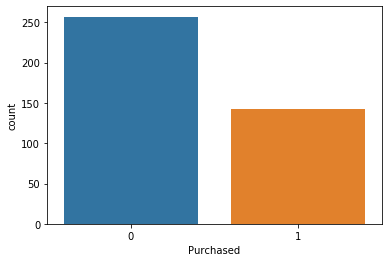

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.countplot(x='Purchased', data=data)


We have more data of class Not purchased that is 0.

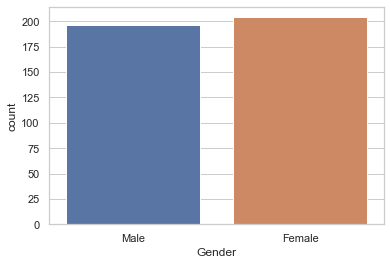

In [16]:
sns.countplot(x='Gender', data=data)


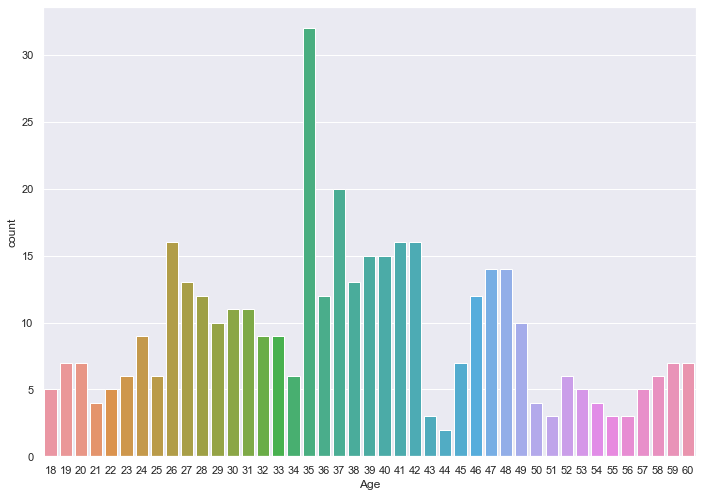

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x='Age', data=data)


In our data people of Age 35 are more

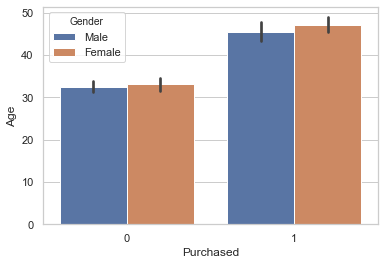

In [20]:

ax = sns.barplot(x="Purchased", y="Age", hue="Gender", data=data)


From the above barplot we can see that Male and Female of age group above 30 purchase products more after seeing ad.

In [41]:
#encoding categorical variables 1-Male 0- Female
data['Gender'] = pd.get_dummies(data["Gender"],drop_first=True)


In [42]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Splitting the Dataset


In [70]:
from sklearn.model_selection import train_test_split
x = data[['Gender','Age','EstimatedSalary']]
y = data['Purchased']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state = 42)


# Model Fitting

In [91]:
#Since It is binary classification using Logistic Regression
from sklearn.linear_model import LogisticRegression

log =LogisticRegression()
log.fit(x_train,y_train)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
prediction = log.predict(x_test)


In [93]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,prediction)
acc

#66% accuracy

0.6625

So from below Confusion Matrix we can say that purchased is good in classifying positive class that is True Positive 

In [94]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,prediction)
c

array([[52,  0],
       [27,  1]], dtype=int64)

# DecisionTree Classifier

Achieved 85% accuracy

In [85]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
acc=accuracy_score(y_test,prediction)
acc

0.85

In [86]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,prediction)
c

array([[46,  6],
       [ 6, 22]], dtype=int64)

# KNN Classification

Achieved 82% accuracy

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test,prediction))

0.825


In [88]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,prediction)
c

array([[46,  6],
       [ 8, 20]], dtype=int64)

# SVM Classifer

Achieved 85% Accuracy

In [89]:
import sklearn.svm
from sklearn import svm

model = svm.SVC(kernel='linear') #convert non seperable problem to seperable
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print (accuracy_score(y_test,y_predict))

0.85


In [90]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test,y_predict)
c

array([[48,  4],
       [ 8, 20]], dtype=int64)